In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('insurance.csv')

In [3]:
#To show first 5 records 
df.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


In [4]:
#How many rows and columns
df.shape

(1338, 8)

In [5]:
#how many category in output variable insuranceclaim 
df['insuranceclaim'].unique()

array([1, 0], dtype=int64)

In [6]:
#How many samples in both categories 0 and 1
df['insuranceclaim'].value_counts()

insuranceclaim
1    783
0    555
Name: count, dtype: int64

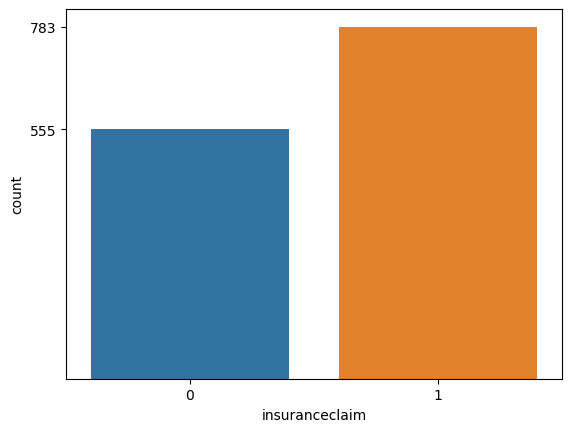

In [7]:
#visualisation to How many samples in both categories 0 and 1
sns.countplot(data=df,x='insuranceclaim')
f=df['insuranceclaim'].value_counts()
plt.yticks(f)
plt.show()

In [8]:
#First EDA Process
#To check null values
df.isnull().sum()

age               0
sex               0
bmi               0
children          0
smoker            0
region            0
charges           0
insuranceclaim    0
dtype: int64

In [9]:
#to check datatypes
df.dtypes

age                 int64
sex                 int64
bmi               float64
children            int64
smoker              int64
region              int64
charges           float64
insuranceclaim      int64
dtype: object

In [10]:
#To check duplicates row
df.duplicated().sum()

1

In [11]:
#show duplicated row
df[df.duplicated()]

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
581,19,1,30.59,0,0,1,1639.5631,1


In [12]:
#To remove duplicates row permanently
df.drop_duplicates(inplace=True)

In [13]:
#show duplicated row
df[df.duplicated()]

,age,sex,bmi,children,smoker,region,charges,insuranceclaim


In [14]:
#To check duplicates row
df.duplicated().sum()

0

In [15]:
#how many children 
df['children'].value_counts()

children
0    573
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

In [16]:
df['sex'].value_counts() #0 female  1 male

sex
1    675
0    662
Name: count, dtype: int64

In [17]:
df['region'].value_counts()

region
2    364
3    325
1    324
0    324
Name: count, dtype: int64

In [18]:
df['smoker'].value_counts()  #0-no  1-yes

smoker
0    1063
1     274
Name: count, dtype: int64

In [19]:
df.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


In [20]:
#separate input and output
X=df.drop('insuranceclaim',axis=1) #input
Y=df['insuranceclaim']#output

In [21]:
#train test split
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1)

In [22]:
X_train.shape,X_test.shape

((935, 7), (402, 7))

In [23]:
#Apply standardscaler on input X_train,X_test
from sklearn.preprocessing import StandardScaler
#create object of  StandardScaler class
ss= StandardScaler()
X_train=ss.fit_transform(X_train)
X_test=ss.transform(X_test)

In [24]:
type(X_train),type(X_test)

(numpy.ndarray, numpy.ndarray)

In [25]:
#Perform the model with Logistic Regression 
#Problem Statement : Either Customer will claim the insurance or not after Hospitalize
from sklearn.linear_model import LogisticRegression

In [26]:
#create object for LogisticRegression class
lr=LogisticRegression()

In [27]:
#Train the model with 70% data , use inbuilt method fit() of LogisticRegression class
lr.fit(X_train,Y_train)

LogisticRegression()

In [28]:
#To test the model with 30% data , use inbuilt method predict() 
Y_pred=lr.predict(X_test)  #Y_pred=1/(1+np.exp(-X_test))
#return output of value of probability (0-1)
Y_pred

array([1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [29]:
#create a dictionary 
dict={'Actual Output':Y_test,'Predicted Output':Y_pred}
df1=pd.DataFrame(dict)
df1

,Actual Output,Predicted Output
629,1,1
1087,1,1
283,1,1
790,1,1
594,1,1
...,...,...
924,0,0
873,1,0
731,0,0
363,0,0


In [30]:
#generate Report : 
#create confusion matrix  : it is used to help how many records are correct
#and how many records are incorrect in the case of classification algorithm
#first find accuracy score of model 
lr.score(X_test,Y_test) #This is accuracy score 

0.8855721393034826

In [31]:
'''
Accuracy Score is very good .
Accuracy score is always good. Most of the time, it is very good . 
means we should not depend only accuracy score  .
we also check recall ,precision ,f1-score.

'''

'\nAccuracy Score is very good .\nAccuracy score is always good. Most of the time, it is very good . \nmeans we should not depend only accuracy score  .\nwe also check recall ,precision ,f1-score.\n\n'

In [32]:
#print confusion matrix , use inbuilt class 
#confusion_matrix() which
#define in sklearn.metrics 
from sklearn.metrics import confusion_matrix

In [33]:
print(confusion_matrix(Y_test,Y_pred))

[[147  25]
 [ 21 209]]


In [34]:
#generate classification_report
#inbuilt class classification_report 
from sklearn.metrics import classification_report
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.88      0.85      0.86       172
           1       0.89      0.91      0.90       230

    accuracy                           0.89       402
   macro avg       0.88      0.88      0.88       402
weighted avg       0.89      0.89      0.89       402



In [35]:
#Apply Logistic Regression on dataset insurance.csv , Got Recall score=91%
#But Logistic Regression : is not select automatic features 
#So apply DecisionTreeClassifier in insurance.csv dataset .
#DecisionTreeClassifier is a classification Algorithm . Its select features
#automatic from given dataset.
#call DecisionTreeClassifier inbuilt class
from sklearn.tree import DecisionTreeClassifier

In [36]:
#Create the object of DecisionTreeClassifier class
dtc=DecisionTreeClassifier(random_state=27) #By default use Gini Index

In [37]:
#train the model with 70% data using DecisionTreeClassifier
dtc.fit(X_train,Y_train)

DecisionTreeClassifier(random_state=27)

In [38]:
#Test the model with 30% data , use predict() inbuilt method
Y_pred=dtc.predict(X_test)
Y_pred

array([1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [39]:
#Create a dictionary 
dict={'Actual Output':Y_test,'Predicted Output':Y_pred}
df1=pd.DataFrame(dict)
df1

,Actual Output,Predicted Output
629,1,1
1087,1,1
283,1,1
790,1,1
594,1,1
...,...,...
924,0,0
873,1,0
731,0,0
363,0,0


In [40]:
#generate classification_report
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       172
           1       0.98      0.98      0.98       230

    accuracy                           0.98       402
   macro avg       0.97      0.97      0.97       402
weighted avg       0.98      0.98      0.98       402



In [41]:
print(confusion_matrix(Y_test,Y_pred))

[[167   5]
 [  5 225]]


In [42]:
#Lets check out what are the important features(input) that are selected 
#by the DecisionTree Gini Index:-
#use inbuilt attributes feature_importances_ of DecisionTreeClassifier class
dtc.feature_importances_ 
#Show Information Gain of each input features

array([0.07925095, 0.        , 0.33126323, 0.37644457, 0.18086023,
       0.        , 0.03218102])

In [43]:
X.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [44]:
dict={'Features':X.columns,'IG':dtc.feature_importances_ }
#IG means Information Gain
df1=pd.DataFrame(dict)
#Sort dataframe by column IG descending order
df1.sort_values(by='IG',ascending=False)

,Features,IG
3,children,0.376445
2,bmi,0.331263
4,smoker,0.180860
0,age,0.079251
6,charges,0.032181
1,sex,0.000000
5,region,0.000000


In [45]:
'''#Create a tree 
from sklearn import tree 
features=X.columns
plt.figure(figsize=(20,20))
_=tree.plot_tree(dtc,feature_names=features,filled=True)'''

'#Create a tree \nfrom sklearn import tree \nfeatures=X.columns\nplt.figure(figsize=(20,20))\n_=tree.plot_tree(dtc,feature_names=features,filled=True)'

In [46]:
#Got Recall =0.98 in DEcisionTreeClassifier class but in the case
#of Logistic Regression : Got recall =0.91 
#DecisionTreeClassifier is the best algorithm in this dataset
#insurance.csv and important features :  children,bmi,smoker,age,charges

In [47]:
'''for i in range(1,101):
    dtc=DecisionTreeClassifier(random_state=i) #By default use Gini Index
    #train the model with 70% data
    dtc.fit(X_train,Y_train)
    #Test the model with 30% data , use predict() inbuilt method
    Y_pred=dtc.predict(X_test)
    print("Random state : ",i)
    #generate classification_report
    print(classification_report(Y_test,Y_pred))
    #confusion matrix
    print(confusion_matrix(Y_test,Y_pred))'''

'for i in range(1,101):\n    dtc=DecisionTreeClassifier(random_state=i) #By default use Gini Index\n    #train the model with 70% data\n    dtc.fit(X_train,Y_train)\n    #Test the model with 30% data , use predict() inbuilt method\n    Y_pred=dtc.predict(X_test)\n    print("Random state : ",i)\n    #generate classification_report\n    print(classification_report(Y_test,Y_pred))\n    #confusion matrix\n    print(confusion_matrix(Y_test,Y_pred))'

In [48]:
#save the model
import pickle

In [49]:
#to open files temporary mode (two files : 1. for standardscaler
#2. DecisionTreeClassifier)
#to  save object of StandardScaler class Now open file in write binary mode

file1=open("scale.pkl","wb")

#next open file for model (DecisionTreeClassifier)
file2=open("model.pkl","wb")
# here file1 and file2 both are temporary file
#save object of StandardScaler class in temp file1
pickle.dump(ss,file1)

#save object of DecisionTreeClassifier  class in temp file2
pickle.dump(lr,file2)

#to open both temporary file
file1.close()
file2.close()


In [50]:
import os
os.getcwd()

'C:\\Users\\Lenovo'

In [51]:
X.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')